<a href="https://colab.research.google.com/github/Raghavendra1178/Brain-Tumour-Identification-Using-CNN/blob/master/VGG19_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all the libraires

In [ ]:
import numpy as np
import pandas as pd
import os
from os import listdir
import cv2
import matplotlib.pyplot as plt
import imutils
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras import layers
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve
import seaborn as sns

In [ ]:
'''The Dataset Consistes of two folders
1.MRI Images which consists of Brain Tumour
2.MRI Images which do not consists of Brain Tumours
'''

'The Dataset Consistes of two folders\n1.MRI Images which consists of Brain Tumour\n2.MRI Images which do not consists of Brain Tumours\n'

In [ ]:
os.listdir('/content/drive/MyDrive/Data')

['yestumor', 'notumor']

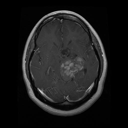

In [ ]:
#showing image of tumor
im = Image.open('/content/drive/MyDrive/Data/yestumor/gg (1).jpg').resize((128, 128))
im


In [ ]:
'''
Data Augmentation:
Since this is a small dataset, There wasn't enough examples to train the neural network. 
Also, data augmentation was useful in tackling the data imbalance issue in the data
Data augmentation is useful to improve performance and outcomes of machine learning models by 
forming new and different examples to train datasets. 
 Data augmentation techniques enable machine learning models to be more robust by creating variations that the model may see in the real world.



'''

"\nData Augmentation:\nSince this is a small dataset, There wasn't enough examples to train the neural network. \nAlso, data augmentation was useful in tackling the data imbalance issue in the data\nData augmentation is useful to improve performance and outcomes of machine learning models by \nforming new and different examples to train datasets. \n Data augmentation techniques enable machine learning models to be more robust by creating variations that the model may see in the real world.\n\n\n\n"

In [ ]:

#function for data augmentation

def augment_data(file_dir, n_generated_samples, save_to_dir):
    
  #ImageDataGenerator generates new images by applying  transformations 
  data_gen = ImageDataGenerator(rotation_range=10, 
                                width_shift_range=0.1, 
                                height_shift_range=0.1, 
                                shear_range=0.1, 
                                brightness_range=(0.3, 1.0),
                                horizontal_flip=True, 
                                vertical_flip=True, 
                                fill_mode='nearest'
                               )

  for filename in listdir(file_dir):
    image = cv2.imread(file_dir + '/' + filename)
    # reshape the image
    image = image.reshape((1,)+image.shape)
    save_prefix = 'aug_' + filename[:-4]
    i=0
    for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir,save_prefix=save_prefix, save_format='jpg'):
      i += 1
      if i > n_generated_samples:
        break

In [ ]:
#setting the directory of our data
yes = os.listdir('/content/drive/MyDrive/Data/yestumor')
no = os.listdir('/content/drive/MyDrive/Data/notumor')

#concate two data
data = np.concatenate([yes,no])
assert (len(data) == len(yes)+len(no))

#mapping our classes to 1 and 0. 1 == yes and 0 == no
target_x = np.full(len(yes),1)
target_y = np.full(len(no),0)

#label of our data
data_target = np.concatenate([target_x,target_y])

assert (len(data_target) == len(target_x)+len(target_y))
assert (len(data_target) == len(data))

print(len(target_x), len(target_y))

2475 493


In [ ]:
'''
Storing our augmented data in new 2 folders
'''

'\nStoring our augmented data in new 2 folders\n'

In [ ]:
augment_data('/content/drive/MyDrive/Data/yestumor',2,'/content/drive/MyDrive/Augmented_yes')

In [ ]:
augment_data('/content/drive/MyDrive/Data/notumor',4,'/content/drive/MyDrive/Augmented_no')

In [ ]:
#setting the directory of our data
yes = os.listdir('/content/drive/MyDrive/Data/yestumor')
no = os.listdir('/content/drive/MyDrive/Augmented_no')

#concate two data
data = np.concatenate([yes,no])
assert (len(data) == len(yes)+len(no))

#mapping our classes to 1 and 0. 1 == yes and 0 == no
target_x = np.full(len(yes),1)
target_y = np.full(len(no),0)

#label of our data
data_target = np.concatenate([target_x,target_y])

assert (len(data_target) == len(target_x)+len(target_y))
assert (len(data_target) == len(data))

print(len(target_x), len(target_y))

2475 2465


In [ ]:

#Setting the height and width of the image for our model
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMAGE_SIZE = [IMG_HEIGHT, IMG_WIDTH]

In [ ]:
X_data = []
count=0
#reading images from directory, resizeing to IMG_HEIGHT * IMG_WIDTH * 3 and appending images to a list
for file in yes:
  img = cv2.imread('/content/drive/MyDrive/Data/yestumor/'+file)
  count=count+1
  print(count)
  img2 = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
  (b, g, r) = cv2.split(img2) 
  img = cv2.merge([r,g,b])
  X_data.append(img)

for file in no:
  img = cv2.imread('/content/drive/MyDrive/Augmented_no/'+file)
  img2 = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
  (b, g, r) = cv2.split(img2) 
  img = cv2.merge([r,g,b])
  X_data.append(img)

X_data = np.squeeze(X_data)
assert (len(X_data) == len(data) == len(data_target))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


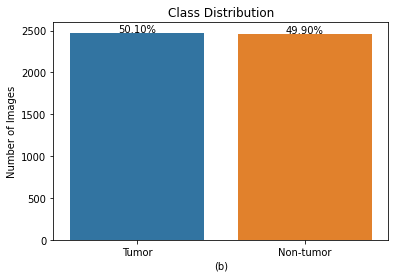

In [ ]:
labels = []
for x in data_target:
  if x == 0:
    labels.append('Non-tumor')
  else:
    labels.append('Tumor')

total = len(labels)

#sns.set(style="darkgrid")
ax = sns.countplot(x=labels)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height*100/total),
            ha="center") 

plt.title('Class Distribution')
plt.ylabel('Number of Images')
plt.xlabel('(b)')
plt.show()

In [ ]:
X=np.array(X_data)
X_data[250].shape == X[250].shape
print(X[250].shape)


(224, 224, 3)


In [ ]:
X = (X/255.0).astype('float32')

In [ ]:

# split the data into 75:15:15 ratio
X_train, X_test, y_train, y_test = train_test_split(X, data_target, random_state=50, test_size=0.15, stratify = data_target)

print(len(y_train))
print(len(y_test))

4199
741


In [ ]:
##VGG-19 Architecture
# VGG19 model is pre-trained with imagenet data 
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

NUM_CLASSES = 1

# vgg19 + dropout + flatten + dropout + dense

vgg19 = Sequential()
vgg19.add(vgg)
vgg19.add(layers.Dropout(0.3))
vgg19.add(layers.Flatten())
vgg19.add(layers.Dropout(0.5))
vgg19.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

# all the vgg-19 layers except for the last layer is non-trainable
vgg19.layers[0].trainable = False

vgg19.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
________________________________________

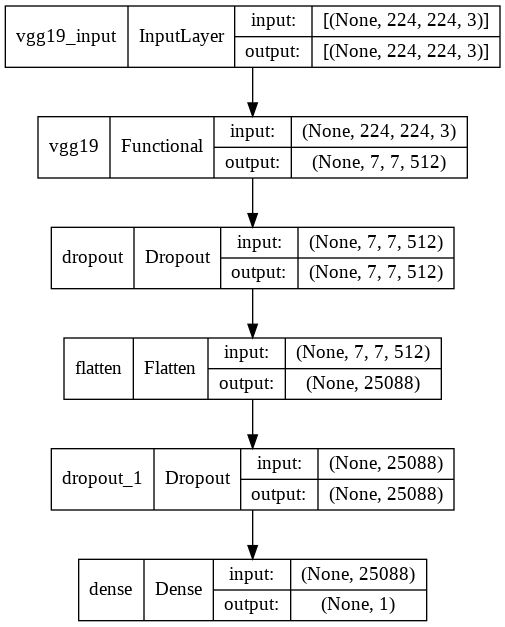

In [ ]:
#plot the model architecture
plot_model(vgg19, to_file='model.png', show_shapes=True)

In [ ]:

# defining cost function and optimization method
vgg19.compile(
    loss='binary_crossentropy', 
    optimizer='Adam', 
    metrics=["acc"]
    )

In [ ]:
#checkpoint which stores the weights of the model when maximum validation accuracy is found
checkpoint_filepath = "weights.best3.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

history = vgg19.fit(X_train, y_train, batch_size = 64, 
                    epochs = 10, validation_split = 0.18, callbacks=[checkpoint])

Epoch 1/10
54/54 [==============================] - 91s 1s/step - loss: 0.2769 - acc: 0.8806 - val_loss: 0.1222 - val_acc: 0.9656
Epoch 2/10
54/54 [==============================] - 37s 688ms/step - loss: 0.1178 - acc: 0.9608 - val_loss: 0.1063 - val_acc: 0.9669
Epoch 3/10
54/54 [==============================] - 37s 689ms/step - loss: 0.0904 - acc: 0.9715 - val_loss: 0.0829 - val_acc: 0.9775
Epoch 4/10
54/54 [==============================] - 37s 683ms/step - loss: 0.0671 - acc: 0.9794 - val_loss: 0.0824 - val_acc: 0.9735
Epoch 5/10
54/54 [==============================] - 37s 682ms/step - loss: 0.0566 - acc: 0.9817 - val_loss: 0.0706 - val_acc: 0.9749
Epoch 6/10
54/54 [==============================] - 37s 688ms/step - loss: 0.0523 - acc: 0.9858 - val_loss: 0.0666 - val_acc: 0.9788
Epoch 7/10
54/54 [==============================] - 37s 688ms/step - loss: 0.0391 - acc: 0.9890 - val_loss: 0.0631 - val_acc: 0.9815
Epoch 8/10
54/54 [==============================] - 37s 683ms/step - los

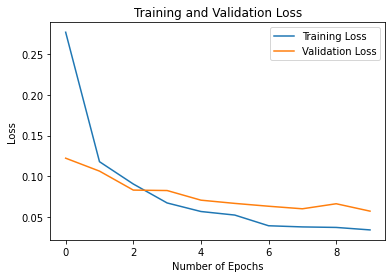

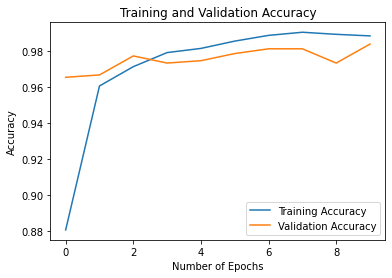

In [ ]:
history = vgg19.history.history

train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['acc']
val_acc = history['val_acc']


    
# Loss
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
    
# Accuracy#
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test set
score = vgg19.evaluate(X_test, y_test, verbose=0) 

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9770580530166626


In [ ]:
y_hat = vgg19.predict(X_test)
y_pred = [1 if x >= 0.5 else 0 for x in y_hat]

#metrics calculation

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: ',specificity)

#classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.977058
Precision: 0.994413
Recall: 0.959569
F1 score: 0.976680
Cohens kappa: 0.954118
ROC AUC: 0.977082
[[368   2]
 [ 15 356]]
Specificity:  0.9945945945945946
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       370
           1       0.99      0.96      0.98       371

    accuracy                           0.98       741
   macro avg       0.98      0.98      0.98       741
weighted avg       0.98      0.98      0.98       741



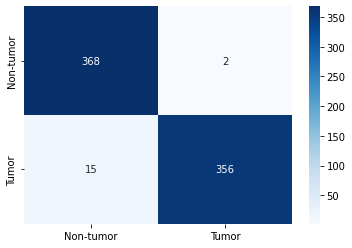

In [ ]:
# plot confusion matrix
categories = ['Non-tumor', 'Tumor']
df_matrix = pd.DataFrame(matrix, index = categories, columns = categories)
sns.heatmap(df_matrix, annot=True, cmap='Blues', fmt='d')

In [ ]:
#index 0 = No , index 1 = Yes
labels = ["No", "Yes"]

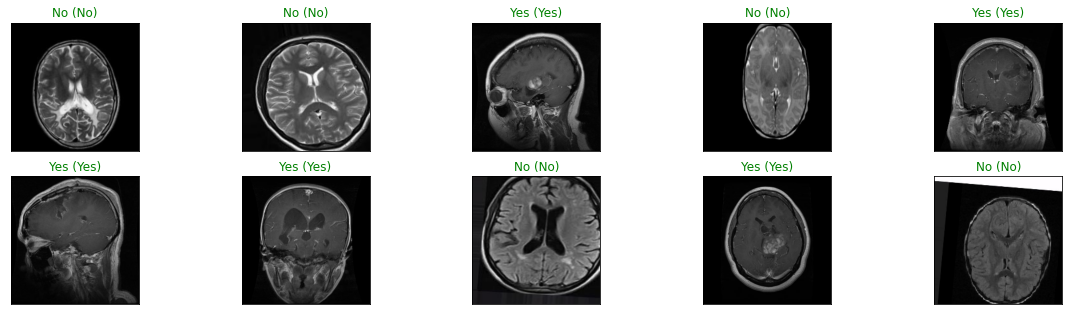

In [ ]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(X_test.shape[0], size=10, replace=False)):
  ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  # Display each image
  ax.imshow(np.squeeze(X_test[index]))
  predict_index = y_pred[index]
  true_index = y_test[index]
  # Set the title for each image
  ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
vgg19.save("brainbgg19.h5")

